In [377]:
# importing packages
import numpy as np
from matplotlib import pyplot as plt
import math
import scipy.stats as stats
import pandas as pd

KCl Regression Fitting

In [378]:
# load data
data_KCl = pd.read_csv("KCl.csv")
KCl_conc = data_KCl["KCl conc"]
KCl_cond = data_KCl["KCl cond"]

# number of data points
ndata = len(KCl_conc)

# weights to be used for weighted linear regression later
weight = [1/(KCl_conc[i]) for i in range(ndata)]
weight[0] = 0.000001

# evaluating the weight matrix
W = np.zeros((ndata, ndata))
for i in range(ndata):
    W[i, i] = weight[i]

# concentration power one-half
KCl_conc_oh = [KCl_conc[i]**1.5 for i in range(ndata)]

# concentration power half
KCl_conc_hf = [KCl_conc[i]**0.5 for i in range(ndata)]

# concentration squared
KCl_conc_sq = [KCl_conc[i]**2 for i in range(ndata)]

C:\Users\lilon\AppData\Local\Temp\ipykernel_27576\2044106086.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  weight = [1/(KCl_conc[i]) for i in range(ndata)]


In [379]:
# Matrix of model predictors
X = np.ones((ndata, 5))
X[:, 1] = KCl_conc
X[:, 2] = KCl_conc_hf
X[:, 3] = KCl_conc_oh
X[:, 4] = KCl_conc_sq

print(X)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [1.00000000e+00 2.00000000e+00 1.41421356e+00 2.82842712e+00
  4.00000000e+00]
 [1.00000000e+00 4.00000000e+00 2.00000000e+00 8.00000000e+00
  1.60000000e+01]
 [1.00000000e+00 6.00000000e+00 2.44948974e+00 1.46969385e+01
  3.60000000e+01]
 [1.00000000e+00 8.00000000e+00 2.82842712e+00 2.26274170e+01
  6.40000000e+01]
 [1.00000000e+00 1.00000000e+01 3.16227766e+00 3.16227766e+01
  1.00000000e+02]
 [1.00000000e+00 2.00000000e+01 4.47213595e+00 8.94427191e+01
  4.00000000e+02]
 [1.00000000e+00 3.00000000e+01 5.47722558e+00 1.64316767e+02
  9.00000000e+02]
 [1.00000000e+00 4.00000000e+01 6.32455532e+00 2.52982213e+02
  1.60000000e+03]
 [1.00000000e+00 5.00000000e+01 7.07106781e+00 3.53553391e+02
  2.50000000e+03]
 [1.00000000e+00 6.00000000e+01 7.74596669e+00 4.64758002e+02
  3.60000000e+03]
 [1.00000000e+00 7.00000000e+01 8.36660027e+00 5.85662019e+02
  4.90000000e+03]
 [1.00000000e+00 8.00000000e+01 8.944271

In [380]:
# X transpose multiply X
A = np.matmul(np.transpose(X), X)

# A inverse
XXinv = np.linalg.inv(A)
print(XXinv)

[[ 9.58784260e-01  2.71717977e-01 -8.97916907e-01 -3.27500295e-02
   1.36397648e-03]
 [ 2.71717977e-01  3.28831882e-01 -7.00144025e-01 -5.06218143e-02
   2.46373475e-03]
 [-8.97916907e-01 -7.00144025e-01  1.67507990e+00  1.01517251e-01
  -4.76251501e-03]
 [-3.27500295e-02 -5.06218143e-02  1.01517251e-01  8.05025967e-03
  -4.00247738e-04]
 [ 1.36397648e-03  2.46373475e-03 -4.76251501e-03 -4.00247738e-04
   2.01982831e-05]]


In [381]:
# X transpose multiply KCl_cond
B = np.matmul(np.transpose(X), KCl_cond)

# fitted parameters
beta_hat = np.matmul(XXinv, B)
print(f"Beta hat is:{beta_hat}")

Beta hat is:[ -4.59905593 109.57494965  39.54802957   3.71838421  -0.30562975]


Data and Model Prediction Comparison

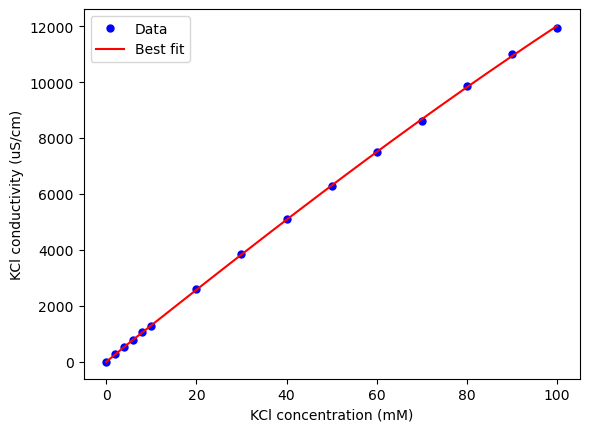

In [382]:
# concentration range
KCl_conc_plot = np.linspace(0, 100, 20)

# concentration power one-half
KCl_conc_plot_oh = [KCl_conc_plot[i]**1.5 for i in range(len(KCl_conc_plot))]

# concentration power half
KCl_conc_plot_hf = [KCl_conc_plot[i]**0.5 for i in range(len(KCl_conc_plot))]

# concentration squared
KCl_conc_plot_sq = [KCl_conc_plot[i]**2 for i in range(len(KCl_conc_plot))]

# predictors matrix of model
X_plot = np.ones((len(KCl_conc_plot), 5))
X_plot[:, 1] = KCl_conc_plot
X_plot[:, 2] = KCl_conc_plot_hf
X_plot[:, 3] = KCl_conc_plot_oh
X_plot[:, 4] = KCl_conc_plot_sq

# predicted conductivity
KCl_cond_plot = np.matmul(beta_hat, np.transpose(X_plot))

# making plots comparison of data and prediction
plt.plot(KCl_conc, KCl_cond, "b.", markersize=10, label="Data")
plt.plot(KCl_conc_plot, KCl_cond_plot, "r-", label="Best fit")
plt.xlabel("KCl concentration (mM)")
plt.ylabel("KCl conductivity (uS/cm)")
plt.legend()
plt.show()   

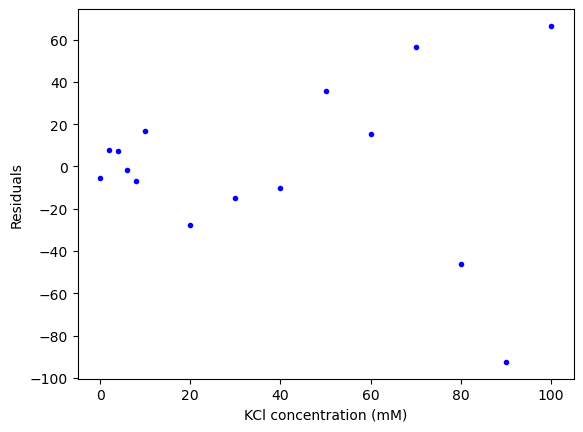

In [383]:
# evaluating model predictions
KCl_cond_pred = np.matmul(beta_hat, np.transpose(X))

# calculating residuals
e = [KCl_cond_pred[i] - KCl_cond[i] for i in range(ndata)]

# assessing model fit
plt.plot(KCl_conc, e, "b.")
plt.xlabel("KCl concentration (mM)")
plt.ylabel("Residuals")
plt.show()

In [384]:
# sum of squared errors
sse = sum(e[i]**2 for i in range(ndata))

# variance of residuals
se = sse/(ndata - 5)

# covariance matrix of fitted parameters
Sigma_beta = se*XXinv
print(Sigma_beta)

[[ 2.04946717e+03  5.80815827e+02 -1.91935902e+03 -7.00054361e+01
   2.91559336e+00]
 [ 5.80815827e+02  7.02900719e+02 -1.49660591e+03 -1.08207603e+02
   5.26640213e+00]
 [-1.91935902e+03 -1.49660591e+03  3.58059826e+03  2.17000093e+02
  -1.01802027e+01]
 [-7.00054361e+01 -1.08207603e+02  2.17000093e+02  1.72079826e+01
  -8.55557013e-01]
 [ 2.91559336e+00  5.26640213e+00 -1.01802027e+01 -8.55557013e-01
   4.31752165e-02]]


In [385]:
# variance of fitted parameters
var_list = [Sigma_beta[i, i] for i in range(len(Sigma_beta))]

# standard deviation of fitted parameters
sd_list = [np.sqrt(var_list[i]) for i in range(len(var_list))]
print(f"Standard deviation :{sd_list}")

# correlation matrix of fitted parameters
corr = np.zeros((len(var_list), len(var_list)))
for i in range(len(var_list)):
    for j in range(len(var_list)):
        corr[i, j] = Sigma_beta[i, j]/(sd_list[i]*sd_list[j])
print(f"Corr: {corr}")

Standard deviation :[45.27104116239823, 26.51227487215837, 59.83810042861865, 4.148250548746919, 0.20778646863676423]
Corr: [[ 1.          0.4839171  -0.7085295  -0.37277459  0.30994826]
 [ 0.4839171   1.         -0.94337131 -0.98388832  0.9559821 ]
 [-0.7085295  -0.94337131  1.          0.87421276 -0.81876895]
 [-0.37277459 -0.98388832  0.87421276  1.         -0.99258273]
 [ 0.30994826  0.9559821  -0.81876895 -0.99258273  1.        ]]


R Squared

In [386]:
# mean conductivity
KCl_cond_mean = np.mean(KCl_cond)

# deviation from mean conductivity
dv = [KCl_cond[i] - KCl_cond_mean for i in range(ndata)]

# total sum of squares
tss = sum(dv[i]**2 for i in range(ndata))

# r squared evaluation
r_squared = 1 - (sse/tss)
print(f"r squared value: {r_squared}")

r squared value: 0.9999142568384536


Weighted Linear Regression

In [387]:
# transforming predictor variables by the weights
X_tr = np.matmul(np.transpose(X), W)

# transforming conductivity by the weights
KCl_cond_tr = np.matmul(W, KCl_cond)

# X_tr transpose multiply X_tr
F = np.matmul(X_tr, X)

# F inverse
XXinv_tr = np.linalg.inv(F)

# X_tr transpose multiply KCl_cond_tr
R = np.matmul(np.transpose(X), KCl_cond_tr)

# evaluating parameters
beta_hat2 = np.matmul(XXinv_tr, R)
print(f"The parameters are: {beta_hat2}")

The parameters are: [ -3.89579193 120.38669661  21.53050987   1.85532363  -0.20842562]


Data and Model Predictions Comparison

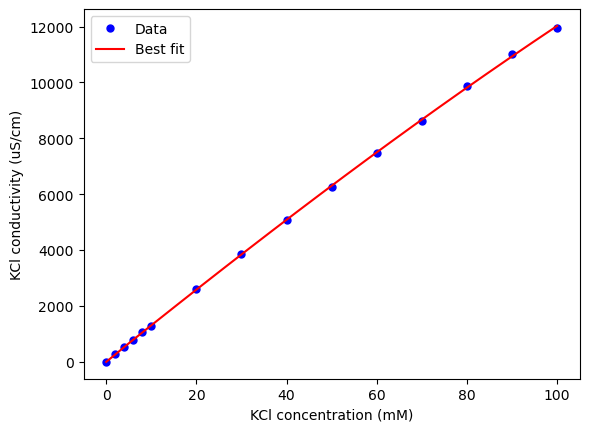

In [388]:
# concentration range
KCl_conc_plot = np.linspace(0, 100, 20)

# concentrations power one-half
KCl_conc_plot_oh = [KCl_conc_plot[i]**1.5 for i in range(len(KCl_conc_plot))]

# concentrations power half
KCl_conc_plot_hf = [KCl_conc_plot[i]**0.5 for i in range(len(KCl_conc_plot))]

# concentrations squared
KCl_conc_plot_sq = [KCl_conc_plot[i]**2 for i in range(len(KCl_conc_plot))]

# predictors matrix of model
X_plot = np.ones((len(KCl_conc_plot), 5))
X_plot[:, 1] = KCl_conc_plot
X_plot[:, 2] = KCl_conc_plot_hf
X_plot[:, 3] = KCl_conc_plot_oh
X_plot[:, 4] = KCl_conc_plot_sq

# evaluating predictions
KCl_cond_plot = np.matmul(beta_hat2, np.transpose(X_plot))

# making plots comparison of data and prediction
plt.plot(KCl_conc, KCl_cond, "b.", markersize=10, label="Data")
plt.plot(KCl_conc_plot, KCl_cond_plot, "r-", label="Best fit")
plt.xlabel("KCl concentration (mM)")
plt.ylabel("KCl conductivity (uS/cm)")
plt.legend()
plt.show()

Predicted weighted KCl_cond is: [-3.89579193e-06  1.35870143e+02  1.33054948e+02  1.31821234e+02
  1.31092150e+02  1.30588455e+02  1.29135023e+02  1.28097010e+02
  1.27090646e+02  1.26051493e+02  1.24967081e+02  1.23837388e+02
  1.22665653e+02  1.21455765e+02  1.20211464e+02]


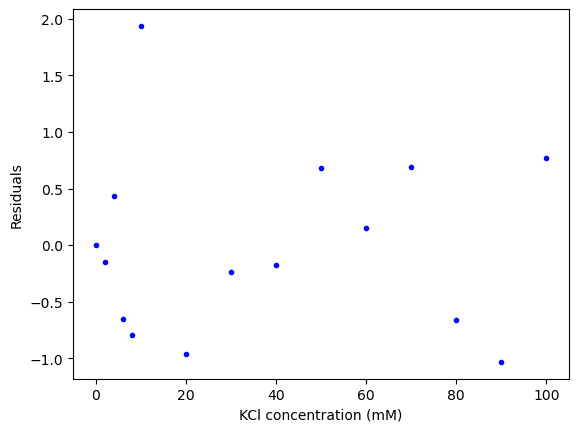

In [389]:
# evaluating model predictions
KCl_cond_pred_tr = np.matmul(beta_hat2, X_tr)
print(f"Predicted weighted KCl_cond is: {KCl_cond_pred_tr}")

# calculating conductivity residuals
e = [KCl_cond_pred_tr[i] - KCl_cond_tr[i] for i in range(ndata)]

# plotting residuals
plt.plot(KCl_conc, e, "b.")
plt.xlabel("KCl concentration (mM)")
plt.ylabel("Residuals")
plt.show()

NdCl3 fitting

In [390]:
# loading data
data_NdCl3 = pd.read_csv("NdCl3.csv")
NdCl3_conc = data_NdCl3["NdCl3 conc"]
NdCl3_cond = data_NdCl3["NdCl3 cond"]

# number of data points
ndata = len(NdCl3_conc)

# concentrations power one-half
NdCl3_conc_oh = [NdCl3_conc[i]**1.5 for i in range(ndata)]

# concentrations squared
NdCl3_conc_sq = [NdCl3_conc[i]**2 for i in range(ndata)]
print(data_NdCl3)

    NdCl3 conc  NdCl3 cond
0            0        0.90
1            2      678.27
2            4     1242.90
3            6     1849.80
4            8     2420.50
5           10     2965.90
6           20     5579.60
7           30     8140.10
8           40    10551.00
9           50    12797.00
10          60    15116.00
11          70    17432.00
12          80    19684.00
13          90    21888.00
14         100    24068.00


In [391]:
# predictors matrix of best fit model
X = np.ones((ndata, 4))
X[:, 1] = NdCl3_conc
X[:, 2] = NdCl3_conc_oh
X[:, 3] = NdCl3_conc_sq
print(X)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.00000000e+00 2.82842712e+00 4.00000000e+00]
 [1.00000000e+00 4.00000000e+00 8.00000000e+00 1.60000000e+01]
 [1.00000000e+00 6.00000000e+00 1.46969385e+01 3.60000000e+01]
 [1.00000000e+00 8.00000000e+00 2.26274170e+01 6.40000000e+01]
 [1.00000000e+00 1.00000000e+01 3.16227766e+01 1.00000000e+02]
 [1.00000000e+00 2.00000000e+01 8.94427191e+01 4.00000000e+02]
 [1.00000000e+00 3.00000000e+01 1.64316767e+02 9.00000000e+02]
 [1.00000000e+00 4.00000000e+01 2.52982213e+02 1.60000000e+03]
 [1.00000000e+00 5.00000000e+01 3.53553391e+02 2.50000000e+03]
 [1.00000000e+00 6.00000000e+01 4.64758002e+02 3.60000000e+03]
 [1.00000000e+00 7.00000000e+01 5.85662019e+02 4.90000000e+03]
 [1.00000000e+00 8.00000000e+01 7.15541753e+02 6.40000000e+03]
 [1.00000000e+00 9.00000000e+01 8.53814968e+02 8.10000000e+03]
 [1.00000000e+00 1.00000000e+02 1.00000000e+03 1.00000000e+04]]


In [392]:
# X transpose multiply X
A = np.matmul(np.transpose(X), X)

# A inverse
XXinv = np.linalg.inv(A)
print(XXinv)

[[ 4.77461087e-01 -1.03590185e-01  2.16677068e-02 -1.18894219e-03]
 [-1.03590185e-01  3.61881362e-02 -8.18998947e-03  4.73115412e-04]
 [ 2.16677068e-02 -8.18998947e-03  1.89786520e-03 -1.11618262e-04]
 [-1.18894219e-03  4.73115412e-04 -1.11618262e-04  6.65770555e-06]]


In [393]:
# X transpose multiply NdCl3_cond
B = np.matmul(np.transpose(X), NdCl3_cond)

# fitted parameters
beta_hat = np.matmul(XXinv, B)
print(f"Beta hat is:{beta_hat}")

Beta hat is:[ 24.14910779 336.90419182 -15.52084737   0.59008388]


Data and Model Prediction Comparison

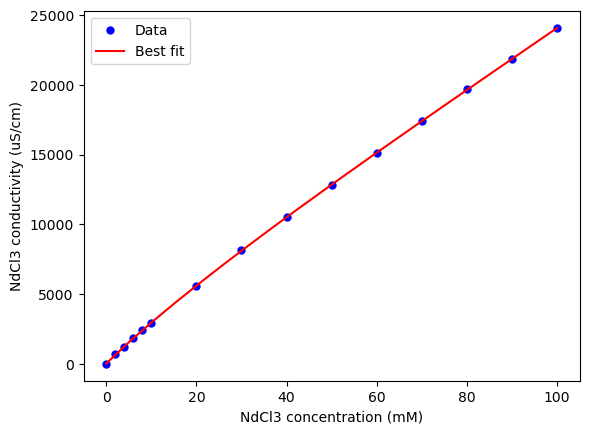

In [394]:
# concentration range
NdCl3_conc_plot = np.linspace(0, 100, 20)

# concentrations power one-half
NdCl3_conc_plot_oh = [NdCl3_conc_plot[i]**1.5 for i in range(len(NdCl3_conc_plot))]

# concentrations squared
NdCl3_conc_plot_sq = [NdCl3_conc_plot[i]**2 for i in range(len(NdCl3_conc_plot))]

# predictors matrix for best fit model
X_plot = np.ones((len(NdCl3_conc_plot), 4))
X_plot[:, 1] = NdCl3_conc_plot
X_plot[:, 2] = NdCl3_conc_plot_oh
X_plot[:, 3] = NdCl3_conc_plot_sq

# evaluating predictions
NdCl3_cond_plot = np.matmul(beta_hat, np.transpose(X_plot))

# making plots comparison of best fit model and data
plt.plot(NdCl3_conc, NdCl3_cond, "b.", markersize=10, label="Data")
plt.plot(NdCl3_conc_plot, NdCl3_cond_plot, "r-", label="Best fit")
plt.xlabel("NdCl3 concentration (mM)")
plt.ylabel("NdCl3 conductivity (uS/cm)")
plt.legend()
plt.show()

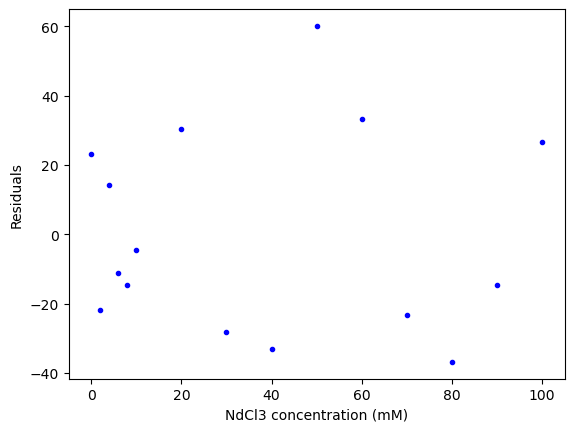

In [395]:
# evaluating model predictions
NdCl3_cond_pred = np.matmul(beta_hat, np.transpose(X))

# calculating residuals
e = [NdCl3_cond_pred[i] - NdCl3_cond[i] for i in range(ndata)]

# making plots of residuals
plt.plot(NdCl3_conc, e, "b.")
plt.xlabel("NdCl3 concentration (mM)")
plt.ylabel("Residuals")
plt.show()

In [396]:
# sum of squared errors
sse = sum(e[i]**2 for i in range(ndata))

# variance of residuals
se = sum(e[i]**2 for i in range(ndata))/(ndata - 4)

# covariance matrix of fitted parameters
Sigma_beta = se*XXinv
print(Sigma_beta)

[[ 5.17041768e+02 -1.12177628e+02  2.34639214e+01 -1.28750340e+00]
 [-1.12177628e+02  3.91880688e+01 -8.86892513e+00  5.12335844e-01]
 [ 2.34639214e+01 -8.86892513e+00  2.05519487e+00 -1.20871219e-01]
 [-1.28750340e+00  5.12335844e-01 -1.20871219e-01  7.20961758e-03]]


In [397]:
# variance of fitted parameters
var_list = [Sigma_beta[i, i] for i in range(len(Sigma_beta))]

# standard deviation of fitted parameters
sd_list = [np.sqrt(var_list[i]) for i in range(len(var_list))]
print(f"Standard deviation: {sd_list}")

# correlation matrix of fitted parameters
corr = np.zeros((len(var_list), len(var_list)))
for i in range(len(var_list)):
    for j in range(len(var_list)):
        corr[i, j] = Sigma_beta[i, j]/(sd_list[i]*sd_list[j])
print(f"Corr: {corr}")

Standard deviation: [22.738552449936524, 6.260037444916349, 1.433595086296333, 0.08490946697055851]
Corr: [[ 1.         -0.78807311  0.71979907 -0.666852  ]
 [-0.78807311  1.         -0.98825166  0.96387717]
 [ 0.71979907 -0.98825166  1.         -0.9929795 ]
 [-0.666852    0.96387717 -0.9929795   1.        ]]


R Squared

In [398]:
# mean of cond
NdCl3_cond_mean = np.mean(NdCl3_cond)

# deviations from mean of cond
dv = [NdCl3_cond[i] - NdCl3_cond_mean for i in range(ndata)]

# total sum of squares
tss = sum(sd[i]**2 for i in range(ndata))

# r squared evaluation
r_squared = 1 - (sse/tss)
print(f"r-squared value is: {r_squared}")

r-squared value is: 0.9999885108155941


KCl & NdCl3 Salts

In [399]:
# loading data
data = pd.read_csv("KCl&NdCl3.csv")
KCl_conc = data["KCl conc"]
NdCl3_conc = data["NdCl3 conc"]
cond = data["Bulk cond"]

# number of data points
ndata = len(KCl_conc)

# concentrations power one-half
KCl_conc_oh = [KCl_conc[i]**1.5 for i in range(ndata)]
NdCl3_conc_oh = [NdCl3_conc[i]**1.5 for i in range(ndata)]

# concentrations power half
KCl_conc_hf = [KCl_conc[i]**0.5 for i in range(ndata)]
NdCl3_conc_hf = [NdCl3_conc[i]**0.5 for i in range(ndata)]

# concentrations power half
KCl_conc_sq = [KCl_conc[i]**2 for i in range(ndata)]
NdCl3_conc_sq = [NdCl3_conc[i]**2 for i in range(ndata)]

# sum of concentrations squared
sum_conc = KCl_conc + NdCl3_conc
sum_sq = [sum_conc[i]**2 for i in range(ndata)]

# product of concentrations
prdt = [KCl_conc[i]*NdCl3_conc[i] for i in range(ndata)]
print(data)

    KCl conc  NdCl3 conc  Bulk cond
0       0.00        0.00       0.55
1       1.11        2.22     893.61
2       2.00        4.00    1545.90
3       4.00        8.00    2959.10
4       6.06       12.12    4359.90
..       ...         ...        ...
70      0.00       60.00   15116.00
71      0.00       70.00   17432.00
72      0.00       80.00   19684.00
73      0.00       90.00   21888.00
74      0.00      100.00   24068.00

[75 rows x 3 columns]


In [400]:
# predictors matrix of best fit model
X = np.ones((ndata, 6))
X[:, 1] = KCl_conc
X[:, 2] = NdCl3_conc
X[:, 3] = KCl_conc_hf
X[:, 4] = NdCl3_conc_hf
X[:, 5] = sum_sq
# X[:, 1] = KCl_conc
# X[:, 2] = NdCl3_conc
# X[:, 3] = KCl_conc_hf
# X[:, 4] = NdCl3_conc_hf
# X[:, 5] = KCl_conc_oh
# X[:, 6] = NdCl3_conc_oh
# X[:, 7] = KCl_conc_sq
# X[:, 8] = NdCl3_conc_sq
# X[:, 1] = KCl_conc
# X[:, 2] = NdCl3_conc
# X[:, 3] = KCl_conc_oh
# X[:, 4] = NdCl3_conc_oh
# X[:, 5] = KCl_conc_sq
# X[:, 6] = NdCl3_conc_sq
# X[:, 7] = prdt

# X transpose multiply X
A = np.matmul(np.transpose(X), X)

# A inverse
XXinv = np.linalg.inv(A)

# X transpose multiply cond
B = np.matmul(np.transpose(X), cond)

# fitted parameters
beta_hat = np.matmul(XXinv, B)
print(f'Beta hat is:{beta_hat}')

Beta hat is:[ 5.22604011e+01  1.30939756e+02  2.30853385e+02 -2.19269373e+01
  1.92734339e+02 -9.25824034e-02]


In [401]:
# predictors matrix of theory model structure
X2 = np.ones((ndata, 9))
X2[:, 1] = KCl_conc
X2[:, 2] = NdCl3_conc
X2[:, 3] = KCl_conc_hf
X2[:, 4] = NdCl3_conc_hf
X2[:, 5] = KCl_conc_oh
X2[:, 6] = NdCl3_conc_oh
X2[:, 7] = KCl_conc_sq
X2[:, 8] = NdCl3_conc_sq

# X2 transpose multiply X2
A2 = np.matmul(np.transpose(X2), X2)

# A2 inverse
XXinv2 = np.linalg.inv(A2)

# X2 transpose multiply cond
B2 = np.matmul(np.transpose(X2), cond)

# fitted parameters
beta_hat2 = np.matmul(XXinv2, B2)
print(f'Beta hat is:{beta_hat2}')

Beta hat is:[ 3.09871831e+02  1.84047514e+02  3.96326507e+02 -1.48140120e+02
 -1.70655686e+02 -9.06304039e+00 -2.53608038e+01  3.35692588e-01
  1.08229023e+00]


Curve fitting of best fit model and theory model structure

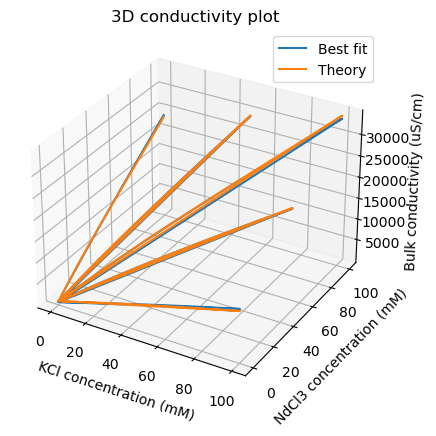

In [402]:
# best fit model predictions
cond_plot = np.matmul(beta_hat, np.transpose(X))

# theory model structure predictions
cond_plot2 = np.matmul(beta_hat2, np.transpose(X2))

# making plots for model comparison
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# plotting
ax.plot3D(KCl_conc, NdCl3_conc, cond_plot, label="Best fit")
ax.plot3D(KCl_conc, NdCl3_conc, cond_plot2, label="Theory")
ax.set_title('3D conductivity plot')
ax.set_zlabel("Bulk conductivity (uS/cm)")
ax.set_xlabel("KCl concentration (mM)")
ax.set_ylabel("NdCl3 concentration (mM)")
ax.legend()
plt.show()

Residuals

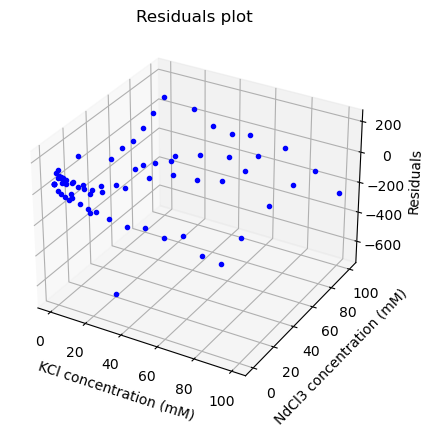

In [403]:
# best fit model predictions
cond_pred = np.matmul(beta_hat, np.transpose(X))

# calculating residuals
e = cond_pred - cond

# making plots of residuals
fig = plt.figure()
 
# syntax for 3-D projection
ax = fig.add_subplot(projection ='3d')

# plotting
ax.plot3D(KCl_conc, NdCl3_conc, e, "b.")
ax.set_title("Residuals plot")
ax.set_zlabel("Residuals")
ax.set_xlabel("KCl concentration (mM)")
ax.set_ylabel("NdCl3 concentration (mM)")
plt.show()

In [404]:
# sum of squared errors
sse = sum(e[i]**2 for i in range(ndata))

# variance of residuals
se = sse/(ndata - 6)

# covariance matrix of fitted parameters
Sigma_beta = se*XXinv
print(Sigma_beta)

[[ 1.27371750e+03  1.55856460e+01  1.55856460e+01 -2.56193555e+02
  -2.56193555e+02  3.14963781e-02]
 [ 1.55856460e+01  5.25250967e+00  9.21134149e-01 -3.50922397e+01
   1.49846210e+00 -8.73355523e-03]
 [ 1.55856460e+01  9.21134149e-01  5.25250967e+00  1.49846210e+00
  -3.50922397e+01 -8.73355523e-03]
 [-2.56193555e+02 -3.50922397e+01  1.49846210e+00  2.94873863e+02
  -4.30173228e+01  2.83558688e-02]
 [-2.56193555e+02  1.49846210e+00 -3.50922397e+01 -4.30173228e+01
   2.94873863e+02  2.83558688e-02]
 [ 3.14963781e-02 -8.73355523e-03 -8.73355523e-03  2.83558688e-02
   2.83558688e-02  3.89407724e-05]]


In [405]:
# variance of fitted parameters
var_list = [Sigma_beta[i, i] for i in range(len(Sigma_beta))]

# standard deviation of fitted parameters
sd_list = [np.sqrt(var_list[i]) for i in range(len(var_list))]
print(f"Standard deviation: {sd_list}")

# correlation matrix of fitted parameters
corr = np.zeros((len(var_list), len(var_list)))
for i in range(len(var_list)):
    for j in range(len(var_list)):
        corr[i, j] = Sigma_beta[i, j]/(sd_list[i]*sd_list[j])
print(f"Corr: {corr}")

Standard deviation: [35.68917903209016, 2.291835436485074, 2.2918354364850586, 17.171891665892037, 17.171891665891902, 0.006240254193237069]
Corr: [[ 1.          0.19054819  0.19054819 -0.41803583 -0.41803583  0.14142356]
 [ 0.19054819  1.          0.17537029 -0.89168101  0.03807538 -0.61066828]
 [ 0.19054819  0.17537029  1.          0.03807538 -0.89168101 -0.61066828]
 [-0.41803583 -0.89168101  0.03807538  1.         -0.14588381  0.26461992]
 [-0.41803583  0.03807538 -0.89168101 -0.14588381  1.          0.26461992]
 [ 0.14142356 -0.61066828 -0.61066828  0.26461992  0.26461992  1.        ]]


R Squared

In [406]:
# mean cond
cond_mean = np.mean(cond)

# deviations from mean cond
dv = [cond[i] - cond_mean for i in range(ndata)]

# total sum of squares
tss = sum(dv[i]**2 for i in range(ndata))

# r squared
r_squared = 1 - (sse/tss)
print(f"r-squared value is: {r_squared}")

r-squared value is: 0.9998030206358192


In [407]:
# data = pd.read_csv("KCl&NdCl3_test.csv")
# KCl_conc = data["KCl conc"]
# NdCl3_conc = data["NdCl3 conc"]
# cond = data["Bulk cond"]
# ndata = len(cond)

# KCl_conc_oh = [KCl_conc[i]**1.5 for i in range(ndata)]
# NdCl3_conc_oh = [NdCl3_conc[i]**1.5 for i in range(ndata)]

# KCl_conc_hf = [KCl_conc[i]**0.5 for i in range(ndata)]
# NdCl3_conc_hf = [NdCl3_conc[i]**0.5 for i in range(ndata)]

# KCl_conc_sq = [KCl_conc[i]**2 for i in range(ndata)]
# NdCl3_conc_sq = [NdCl3_conc[i]**2 for i in range(ndata)]

# sum_conc = KCl_conc + NdCl3_conc
# sum_sq = [sum_conc[i]**2 for i in range(ndata)]

# prdt = [KCl_conc[i]*NdCl3_conc[i] for i in range(ndata)]

# X = np.ones((ndata, 6))
# X[:, 1] = KCl_conc
# X[:, 2] = NdCl3_conc
# X[:, 3] = KCl_conc_hf
# X[:, 4] = NdCl3_conc_hf
# X[:, 5] = sum_sq
# # X[:, 1] = KCl_conc
# # X[:, 2] = NdCl3_conc
# # X[:, 3] = KCl_conc_hf
# # X[:, 4] = NdCl3_conc_hf
# # X[:, 5] = KCl_conc_oh
# # X[:, 6] = NdCl3_conc_oh
# # X[:, 7] = KCl_conc_sq
# # X[:, 8] = NdCl3_conc_sq
# # X[:, 1] = KCl_conc
# # X[:, 2] = NdCl3_conc
# # X[:, 3] = KCl_conc_oh
# # X[:, 4] = NdCl3_conc_oh
# # X[:, 5] = KCl_conc_sq
# # X[:, 6] = NdCl3_conc_sq
# # X[:, 7] = prdt

# cond_pred = np.matmul(beta_hat, np.transpose(X))

# e = cond_pred - cond

# fig = plt.figure()
 
# # syntax for 3-D projection
# ax = fig.add_subplot(projection ='3d')

# # plotting
# ax.plot3D(KCl_conc, NdCl3_conc, e, "b.")
# ax.set_title("Residuals plot")
# ax.set_zlabel("Residuals")
# ax.set_xlabel("KCl concentration (mM)")
# ax.set_ylabel("NdCl3 concentration (mM)")
# plt.show()

In [408]:
# # r squared evaluation
# sse = sum(e[i]**2 for i in range(ndata))
# cond_mean = np.mean(cond)
# sd = [cond[i] - cond_mean for i in range(ndata)]
# tss = sum(sd[i]**2 for i in range(ndata))

# r_squared = 1 - (sse/tss)
# print(f"r-squared value is: {r_squared}")

All salts

In [409]:
# loading data
data = pd.read_csv("All_salts.csv")
KCl_conc = data["KCl_conc"]
NdCl3_conc = data["NdCl3_conc"]
NaCl_conc = data["NaCl_conc"]
CaCl2_conc = data["CaCl2_conc"]
LaCl3_conc = data["LaCl3_conc"]
cond = data["Bulk_cond"]

# number of data points
ndata = len(cond)

# concentrations power half
KCl_conc_hf = [KCl_conc[i]**0.5 for i in range(ndata)]
NdCl3_conc_hf = [NdCl3_conc[i]**0.5 for i in range(ndata)]
NaCl_conc_hf = [NaCl_conc[i]**0.5 for i in range(ndata)]
CaCl2_conc_hf = [CaCl2_conc[i]**0.5 for i in range(ndata)]
LaCl3_conc_hf = [LaCl3_conc[i]**0.5 for i in range(ndata)]

# concentrations power one-half
KCl_conc_oh = [KCl_conc[i]**1.5 for i in range(ndata)]
NdCl3_conc_oh = [NdCl3_conc[i]**1.5 for i in range(ndata)]
NaCl_conc_oh = [NaCl_conc[i]**1.5 for i in range(ndata)]
CaCl2_conc_oh = [CaCl2_conc[i]**1.5 for i in range(ndata)]
LaCl3_conc_oh = [LaCl3_conc[i]**1.5 for i in range(ndata)]

# square of concentrations
KCl_conc_sq = [KCl_conc[i]**2 for i in range(ndata)]
NdCl3_conc_sq = [NdCl3_conc[i]**2 for i in range(ndata)]
NaCl_conc_sq = [NaCl_conc[i]**2 for i in range(ndata)]
CaCl2_conc_sq = [CaCl2_conc[i]**2 for i in range(ndata)]
LaCl3_conc_sq = [LaCl3_conc[i]**2 for i in range(ndata)]

# sum of concentrations square
sum_conc = KCl_conc + NdCl3_conc + NaCl_conc + CaCl2_conc + LaCl3_conc 
sum_sq = [sum_conc[i]**2 for i in range(ndata)]

# interaction terms
prdt1 = [KCl_conc[i]*NdCl3_conc[i] for i in range(ndata)]
prdt5 = [NaCl_conc[i]*CaCl2_conc[i] for i in range(ndata)]
prdt6 = [NaCl_conc[i]*LaCl3_conc[i] for i in range(ndata)]
prdt9 = [CaCl2_conc[i]*LaCl3_conc[i] for i in range(ndata)]

In [410]:
# predictors matrix for best fit model
X = np.ones((ndata_train, 20))
# X[:, 1] = KCl_conc
# X[:, 2] = NdCl3_conc
# X[:, 3] = NaCl_conc
# X[:, 4] = CaCl2_conc
# X[:, 5] = LaCl3_conc
# X[:, 6] = KCl_conc_hf
# X[:, 7] = NdCl3_conc_hf
# X[:, 8] = NaCl_conc_hf
# X[:, 9] = CaCl2_conc_hf
# X[:, 10] = LaCl3_conc_hf
# X[:, 11] = KCl_conc_oh
# X[:, 12] = NdCl3_conc_oh
# X[:, 13] = NaCl_conc_oh
# X[:, 14] = CaCl2_conc_oh
# X[:, 15] = LaCl3_conc_oh
# X[:, 16] = KCl_conc_sq
# X[:, 17] = NdCl3_conc_sq
# X[:, 18] = NaCl_conc_sq
# X[:, 19] = CaCl2_conc_sq
# X[:, 20] = LaCl3_conc_sq
# X[:, 1] = KCl_conc
# X[:, 2] = NdCl3_conc
# X[:, 3] = NaCl_conc
# X[:, 4] = CaCl2_conc
# X[:, 5] = KCl_conc_oh
# X[:, 6] = NdCl3_conc_oh
# X[:, 7] = NaCl_conc_oh
# X[:, 8] = CaCl2_conc_oh
# X[:, 9] = sum_sq
# X[:, 1] = KCl_conc
# X[:, 2] = NdCl3_conc
# X[:, 3] = NaCl_conc
# X[:, 4] = CaCl2_conc
# X[:, 5] = KCl_conc_hf
# X[:, 6] = NdCl3_conc_hf
# X[:, 7] = NaCl_conc_hf
# X[:, 8] = CaCl2_conc_hf
# X[:, 9] = sum_sq
# X[:, 1] = KCl_conc
# X[:, 2] = NdCl3_conc
# X[:, 3] = NaCl_conc
# X[:, 4] = CaCl2_conc
# X[:, 5] = LaCl3_conc
# X[:, 6] = KCl_conc_hf
# X[:, 7] = NdCl3_conc_hf
# X[:, 8] = NaCl_conc_hf
# X[:, 9] = CaCl2_conc_hf
# X[:, 10] = LaCl3_conc_hf
# X[:, 11] = sum_sq
X[:, 1] = KCl_conc
X[:, 2] = NdCl3_conc
X[:, 3] = NaCl_conc
X[:, 4] = CaCl2_conc
X[:, 5] = LaCl3_conc
X[:, 6] = KCl_conc_oh
X[:, 7] = NdCl3_conc_oh
X[:, 8] = NaCl_conc_oh
X[:, 9] = CaCl2_conc_oh
X[:, 10] = LaCl3_conc_oh
X[:, 11] = KCl_conc_sq
X[:, 12] = NdCl3_conc_sq
X[:, 13] = NaCl_conc_sq
X[:, 14] = CaCl2_conc_sq
X[:, 15] = LaCl3_conc_sq
X[:, 16] = prdt1
X[:, 17] = prdt5
X[:, 18] = prdt6
X[:, 19] = prdt9

# X transpose multiply X
A = np.matmul(np.transpose(X), X)

# A inverse
XXinv = np.linalg.inv(A)

# X transpose multiply cond
B = np.matmul(np.transpose(X), cond)

# fitted parameters
beta_hat = np.matmul(XXinv, B)
print(f'Beta hat is:{beta_hat}')

Beta hat is:[ 6.06135912e+01  1.33982294e+02  3.35437373e+02  1.07512594e+02
  2.05881338e+02  3.14521760e+02 -2.37650912e+00 -1.70521584e+01
 -2.59873911e+00 -5.87563144e+00 -1.43494389e+01  1.01155246e-01
  7.70638291e-01  1.04427431e-01  1.54222373e-01  7.55944259e-01
 -1.92328407e-01 -1.08874174e-01 -4.82401004e-01 -1.06325415e+00]


In [411]:
# predictors matrix for theory model structure
X2 = np.ones((ndata_train, 21))
X2[:, 1] = KCl_conc
X2[:, 2] = NdCl3_conc
X2[:, 3] = NaCl_conc
X2[:, 4] = CaCl2_conc
X2[:, 5] = LaCl3_conc
X2[:, 6] = KCl_conc_hf
X2[:, 7] = NdCl3_conc_hf
X2[:, 8] = NaCl_conc_hf
X2[:, 9] = CaCl2_conc_hf
X2[:, 10] = LaCl3_conc_hf
X2[:, 11] = KCl_conc_oh
X2[:, 12] = NdCl3_conc_oh
X2[:, 13] = NaCl_conc_oh
X2[:, 14] = CaCl2_conc_oh
X2[:, 15] = LaCl3_conc_oh
X2[:, 16] = KCl_conc_sq
X2[:, 17] = NdCl3_conc_sq
X2[:, 18] = NaCl_conc_sq
X2[:, 19] = CaCl2_conc_sq
X2[:, 20] = LaCl3_conc_sq

# X2 transpose multiply X2
A2 = np.matmul(np.transpose(X2), X2)

# A2 inverse
XXinv2 = np.linalg.inv(A2)

# X2 transpose multiply cond
B2 = np.matmul(np.transpose(X2), cond)

# fitted parameters
beta_hat2 = np.matmul(XXinv2, B2)
print(f'Beta hat is:{beta_hat2}')

Beta hat is:[ 2.11134861e+02  1.63810833e+02  3.76089826e+02  1.69216789e+02
  1.96809942e+02  3.07340160e+02 -8.83179046e+01 -1.10833470e+02
 -1.06558237e+02 -1.15622059e+01 -2.93635494e+01 -6.42109517e+00
 -2.27188585e+01 -1.43098623e+01 -5.48448641e+00 -1.77885487e+01
  2.19731185e-01  9.66328825e-01  7.55913624e-01  2.09035189e-01
  1.43419795e+00]


Plotting curves of best fit and theory model structure

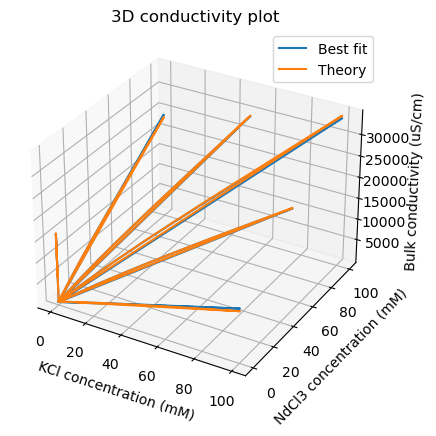

In [412]:
# best fit model presictions
cond_plot = np.matmul(beta_hat, np.transpose(X))

# theory model structure predictions
cond_plot2 = np.matmul(beta_hat2, np.transpose(X2))

# making plots for model comparison
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot3D(KCl_conc, NdCl3_conc, cond_plot, label="Best fit")
ax.plot3D(KCl_conc, NdCl3_conc, cond_plot2, label="Theory")
# ax.scatter(KCl_conc, NdCl3_conc, cond, label="Data")
ax.set_title('3D conductivity plot')
ax.set_zlabel("Bulk conductivity (uS/cm)")
ax.set_xlabel("KCl concentration (mM)")
ax.set_ylabel("NdCl3 concentration (mM)")
ax.legend()
plt.show()

Assessing Residuals

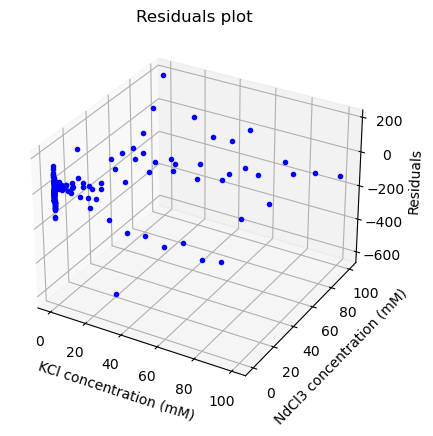

In [413]:
# best fit model predictions
cond_pred = np.matmul(beta_hat, np.transpose(X))

# residuals
e = cond_pred - cond

# making plot of residuals
fig = plt.figure()
 
# syntax for 3-D projection
ax = fig.add_subplot(projection ='3d')

# plotting
ax.plot3D(KCl_conc, NdCl3_conc, e, "b.")
ax.set_title("Residuals plot")
ax.set_zlabel("Residuals")
ax.set_xlabel("KCl concentration (mM)")
ax.set_ylabel("NdCl3 concentration (mM)")
plt.show()

In [414]:
# sum of squared errors
sse = sum(e[i]**2 for i in range(ndata_train))

# variance of residuals
se = sse/(ndata_train - 20)

# covariance matrix of fitted parameters
Sigma_beta = se*XXinv
print(Sigma_beta)

[[ 2.39812603e+02 -3.06071618e+01 -3.06071618e+01 -2.48205967e+01
  -2.79385616e+01 -7.02480693e+01  6.57858899e+00  6.57858899e+00
   4.69477659e+00  5.24204933e+00  2.26732506e+01 -3.84193571e-01
  -3.84193571e-01 -2.50417592e-01 -2.72369036e-01 -1.93161344e+00
   3.92810901e-02  1.86041238e-01  1.76092812e-01  2.89925710e-01]
 [-3.06071618e+01  3.81202885e+01 -1.40690707e+01  3.16784027e+00
   3.56578456e+00  8.96572573e+00 -9.40852991e+00  3.40275063e+00
  -5.99191974e-01 -6.69040118e-01 -2.89377556e+00  5.73919244e-01
  -1.99845407e-01  3.19606712e-02  3.47623230e-02  2.46530851e-01
  -5.10260239e-03 -2.37443495e-02 -2.24746370e-02 -3.70030725e-02]
 [-3.06071618e+01 -1.40690707e+01  3.81202885e+01  3.16784027e+00
   3.56578456e+00  8.96572573e+00  3.40275063e+00 -9.40852991e+00
  -5.99191974e-01 -6.69040118e-01 -2.89377556e+00 -1.99845407e-01
   5.73919244e-01  3.19606712e-02  3.47623230e-02  2.46530851e-01
  -5.10260239e-03 -2.37443495e-02 -2.24746370e-02 -3.70030725e-02]
 [-2.48

In [415]:
# variance of fitted parameters
var_list = [Sigma_beta[i, i] for i in range(len(Sigma_beta))]

# standard deviation of fitted parameters
sd_list = [np.sqrt(var_list[i]) for i in range(len(var_list))]
print(f"Standard deviation: {sd_list}")

# correlation matrix of fitted parameters
corr = np.zeros((len(var_list), len(var_list)))
for i in range(len(var_list)):
    for j in range(len(var_list)):
        corr[i, j] = Sigma_beta[i, j]/(sd_list[i]*sd_list[j])
print(f"Corr: {corr}")

Standard deviation: [15.485883990677996, 6.174162981495371, 6.174162981494402, 5.304246977462324, 5.489553617856604, 11.379737643584361, 1.5478418823986602, 1.5478418823984241, 1.457340831059887, 1.4879375662946015, 4.552728416495683, 0.0972417413247484, 0.09724174132473415, 0.09970799399105411, 0.10127366400930204, 0.44133050766276216, 0.009458506303753597, 0.052052963203612905, 0.07015304572530653, 0.10032675815471338]
Corr: [[ 1.         -0.32011717 -0.32011717 -0.30217079 -0.32864801 -0.39862648
   0.27445438  0.27445438  0.20802609  0.22749947  0.3215926  -0.2551299
  -0.2551299  -0.16218058 -0.17367016 -0.28263131  0.26817913  0.23079573
   0.16209107  0.18660959]
 [-0.32011717  1.         -0.36907042  0.09673006  0.10520587  0.12760718
  -0.9845031   0.35606185 -0.06659272 -0.07282649 -0.10294731  0.95591653
  -0.33286134  0.05191679  0.0555948   0.09047513 -0.08737578 -0.07388167
  -0.05188814 -0.05973693]
 [-0.32011717 -0.36907042  1.          0.09673006  0.10520587  0.1276071

R Squared

In [416]:
# mean cond
cond_mean = np.mean(cond)

# deviations from mean cond
dv = [cond[i] - cond_mean for i in range(ndata)]

# total sum of squares
tss = sum(dv[i]**2 for i in range(ndata))

# r squared
r_squared = 1 - (sse/tss)
print(f"r-squared value is: {r_squared}")

r-squared value is: 0.9998570322001264


In [417]:
# # model validation with new data
# test_data = pd.read_csv("Test_data.csv")
# NaCl_conc = test_data["NaCl_conc"]
# CaCl2_conc = test_data["CaCl2_conc"]
# KCl_conc = test_data["KCl_conc"]
# NdCl3_conc = test_data["NdCl3_conc"]
# test_cond = test_data["Cond"]


# ndata = len(test_cond)
# LaCl3_conc = [0 for i in range(ndata)]
# # KCl_conc = np.zeros(ndata)
# # NdCl3_conc = np.zeros(ndata)

# NaCl_conc_oh = [NaCl_conc[i]**1.5 for i in range(ndata)]
# CaCl2_conc_oh = [CaCl2_conc[i]**1.5 for i in range(ndata)]
# KCl_conc_oh = [KCl_conc[i]**1.5 for i in range(ndata)]
# NdCl3_conc_oh = [NdCl3_conc[i]**1.5 for i in range(ndata)]


# NaCl_conc_hf = [NaCl_conc[i]**0.5 for i in range(ndata)]
# CaCl2_conc_hf = [CaCl2_conc[i]**0.5 for i in range(ndata)]
# KCl_conc_hf = [KCl_conc[i]**0.5 for i in range(ndata)]
# NdCl3_conc_hf = [NdCl3_conc[i]**0.5 for i in range(ndata)]
# LaCl3_conc_hf = LaCl3_conc

# NaCl_conc_sq = [NaCl_conc[i]**2 for i in range(ndata)]
# CaCl2_conc_sq = [CaCl2_conc[i]**2 for i in range(ndata)]
# KCl_conc_sq = [KCl_conc[i]**2 for i in range(ndata)]
# NdCl3_conc_sq = [NdCl3_conc[i]**2 for i in range(ndata)]

# # KCl_conc_oh = KCl_conc
# # NdCl3_conc_oh = NdCl3_conc

# # KCl_conc_hf = KCl_conc
# # NdCl3_conc_hf = NdCl3_conc

# # KCl_conc_sq = KCl_conc
# # NdCl3_conc_sq = NdCl3_conc

# sum_conc = NaCl_conc + CaCl2_conc + KCl_conc + NdCl3_conc + LaCl3_conc
# sum_sq = [sum_conc[i]**2 for i in range(ndata)]

# X = np.ones((ndata, 12))
# # X[:, 1] = KCl_conc
# # X[:, 2] = NdCl3_conc
# # X[:, 3] = NaCl_conc
# # X[:, 4] = CaCl2_conc
# # X[:, 5] = KCl_conc_hf
# # X[:, 6] = NdCl3_conc_hf
# # X[:, 7] = NaCl_conc_hf
# # X[:, 8] = CaCl2_conc_hf
# # X[:, 9] = KCl_conc_oh
# # X[:, 10] = NdCl3_conc_oh
# # X[:, 11] = NaCl_conc_oh
# # X[:, 12] = CaCl2_conc_oh
# # X[:, 13] = KCl_conc_sq
# # X[:, 14] = NdCl3_conc_sq
# # X[:, 15] = NaCl_conc_sq
# # X[:, 16] = CaCl2_conc_sq
# # X[:, 1] = KCl_conc
# # X[:, 2] = NdCl3_conc
# # X[:, 3] = NaCl_conc
# # X[:, 4] = CaCl2_conc
# # X[:, 5] = KCl_conc_oh
# # X[:, 6] = NdCl3_conc_oh
# # X[:, 7] = NaCl_conc_oh
# # X[:, 8] = CaCl2_conc_oh
# # X[:, 9] = sum_sq
# X[:, 1] = KCl_conc
# X[:, 2] = NdCl3_conc
# X[:, 3] = NaCl_conc
# X[:, 4] = CaCl2_conc
# X[:, 5] = LaCl3_conc
# X[:, 6] = KCl_conc_hf
# X[:, 7] = NdCl3_conc_hf
# X[:, 8] = NaCl_conc_hf
# X[:, 9] = CaCl2_conc_hf
# X[:, 10] = LaCl3_conc_hf
# X[:, 11] = sum_sq

# cond_pred = np.matmul(beta_hat, np.transpose(X))
# e = cond_pred - test_cond

# # plotting residuals
# fig = plt.figure()
 
# # syntax for 3-D projection
# ax = fig.add_subplot(projection ='3d')

# # plotting
# ax.plot3D(NaCl_conc, CaCl2_conc, e, "b.")
# ax.set_title("Residuals plot")
# ax.set_zlabel("Residuals")
# ax.set_xlabel("KCl concentration (mM)")
# ax.set_ylabel("NdCl3 concentration (mM)")
# plt.show()

In [418]:
# # r squared evaluation
# sse = sum(e[i]**2 for i in range(ndata))
# test_cond_mean = np.mean(test_cond)
# sd = [test_cond[i] - test_cond_mean for i in range(ndata)]
# tss = sum(sd[i]**2 for i in range(ndata))

# r_squared = 1 - (sse/tss)
# print(f"r-squared value is: {r_squared}")